In [1]:
import sys
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(f'Python  version: {sys.version}')
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

Python  version: 3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
pandas  version: 1.4.4
numpy   version: 1.22.4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataAir.csv',usecols=[0,1,2,3,4,5,6,7,8,9,10],parse_dates=['date'], skipinitialspace=True)
data

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1761,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1762,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1763,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm25              1706 non-null   float64       
 2   pm10              1764 non-null   float64       
 3   o3                1701 non-null   float64       
 4   no2               1454 non-null   float64       
 5   co                1247 non-null   float64       
 6   avgT              1695 non-null   float64       
 7   humid             1765 non-null   float64       
 8   pressure-monthly  1765 non-null   float64       
 9   windDir           1735 non-null   float64       
 10  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 151.8 KB


In [7]:
data=data.sort_values('date').reset_index(drop=True).copy()
data

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1761,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1762,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1763,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [8]:
y_col='pm25'

In [9]:
data.dropna(subset=[y_col], inplace=True)
data=data.reset_index(drop=True)
data

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1701,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0
1702,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0
1703,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0
1704,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0


In [10]:
def date_parts(data, date_colname='date'):
    '''create year, month, day, dayname columns'''
    data['year']=data['date'].dt.year
    data['month']=data['date'].dt.month
    data['day']=data['date'].dt.day
    data['day_name']=data['date'].dt.day_name().astype('category')

In [11]:
date_parts(data)

In [12]:
data

,date,pm25,pm10,o3,no2,co,avgT,humid,pressure-monthly,windDir,windSpd,year,month,day,day_name
0,2018-01-01,21.0,32.0,37.91,13.26,0.64,27.1,70.0,1009.40,100.0,9.0,2018,1,1,Monday
1,2018-01-02,26.0,37.0,38.22,18.96,0.68,27.5,67.0,1009.40,120.0,4.0,2018,1,2,Tuesday
2,2018-01-03,38.0,51.0,29.50,29.08,0.85,28.2,66.0,1009.40,60.0,4.0,2018,1,3,Wednesday
3,2018-01-04,39.0,55.0,45.09,22.22,0.86,29.3,64.0,1009.40,330.0,6.0,2018,1,4,Thursday
4,2018-01-05,51.0,67.0,49.26,36.70,1.00,30.4,63.0,1009.40,NaN,NaN,2018,1,5,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1701,2022-10-27,8.0,20.0,16.91,NaN,NaN,28.5,79.0,1009.24,120.0,9.0,2022,10,27,Thursday
1702,2022-10-28,11.0,26.0,17.96,NaN,NaN,29.6,72.0,1009.24,170.0,7.0,2022,10,28,Friday
1703,2022-10-29,12.0,27.0,33.70,NaN,NaN,29.5,62.0,1009.24,120.0,13.0,2022,10,29,Saturday
1704,2022-10-30,23.0,43.0,45.26,NaN,NaN,30.0,62.0,1009.24,120.0,13.0,2022,10,30,Sunday


In [13]:
data.columns

Index(['date', 'pm25', 'pm10', 'o3', 'no2', 'co', 'avgT', 'humid',
       'pressure-monthly', 'windDir', 'windSpd', 'year', 'month', 'day',
       'day_name'],
      dtype='object')

In [14]:
df=data[['date', 'year', 'month', 'day', 'day_name', y_col]]
df

,date,year,month,day,day_name,pm25
0,2018-01-01,2018,1,1,Monday,21.0
1,2018-01-02,2018,1,2,Tuesday,26.0
2,2018-01-03,2018,1,3,Wednesday,38.0
3,2018-01-04,2018,1,4,Thursday,39.0
4,2018-01-05,2018,1,5,Friday,51.0
...,...,...,...,...,...,...
1701,2022-10-27,2022,10,27,Thursday,8.0
1702,2022-10-28,2022,10,28,Friday,11.0
1703,2022-10-29,2022,10,29,Saturday,12.0
1704,2022-10-30,2022,10,30,Sunday,23.0


In [15]:
df=df.set_index('date')
df

,year,month,day,day_name,pm25
date,,,,,
2018-01-01,2018,1,1,Monday,21.0
2018-01-02,2018,1,2,Tuesday,26.0
2018-01-03,2018,1,3,Wednesday,38.0
2018-01-04,2018,1,4,Thursday,39.0
2018-01-05,2018,1,5,Friday,51.0
...,...,...,...,...,...
2022-10-27,2022,10,27,Thursday,8.0
2022-10-28,2022,10,28,Friday,11.0
2022-10-29,2022,10,29,Saturday,12.0


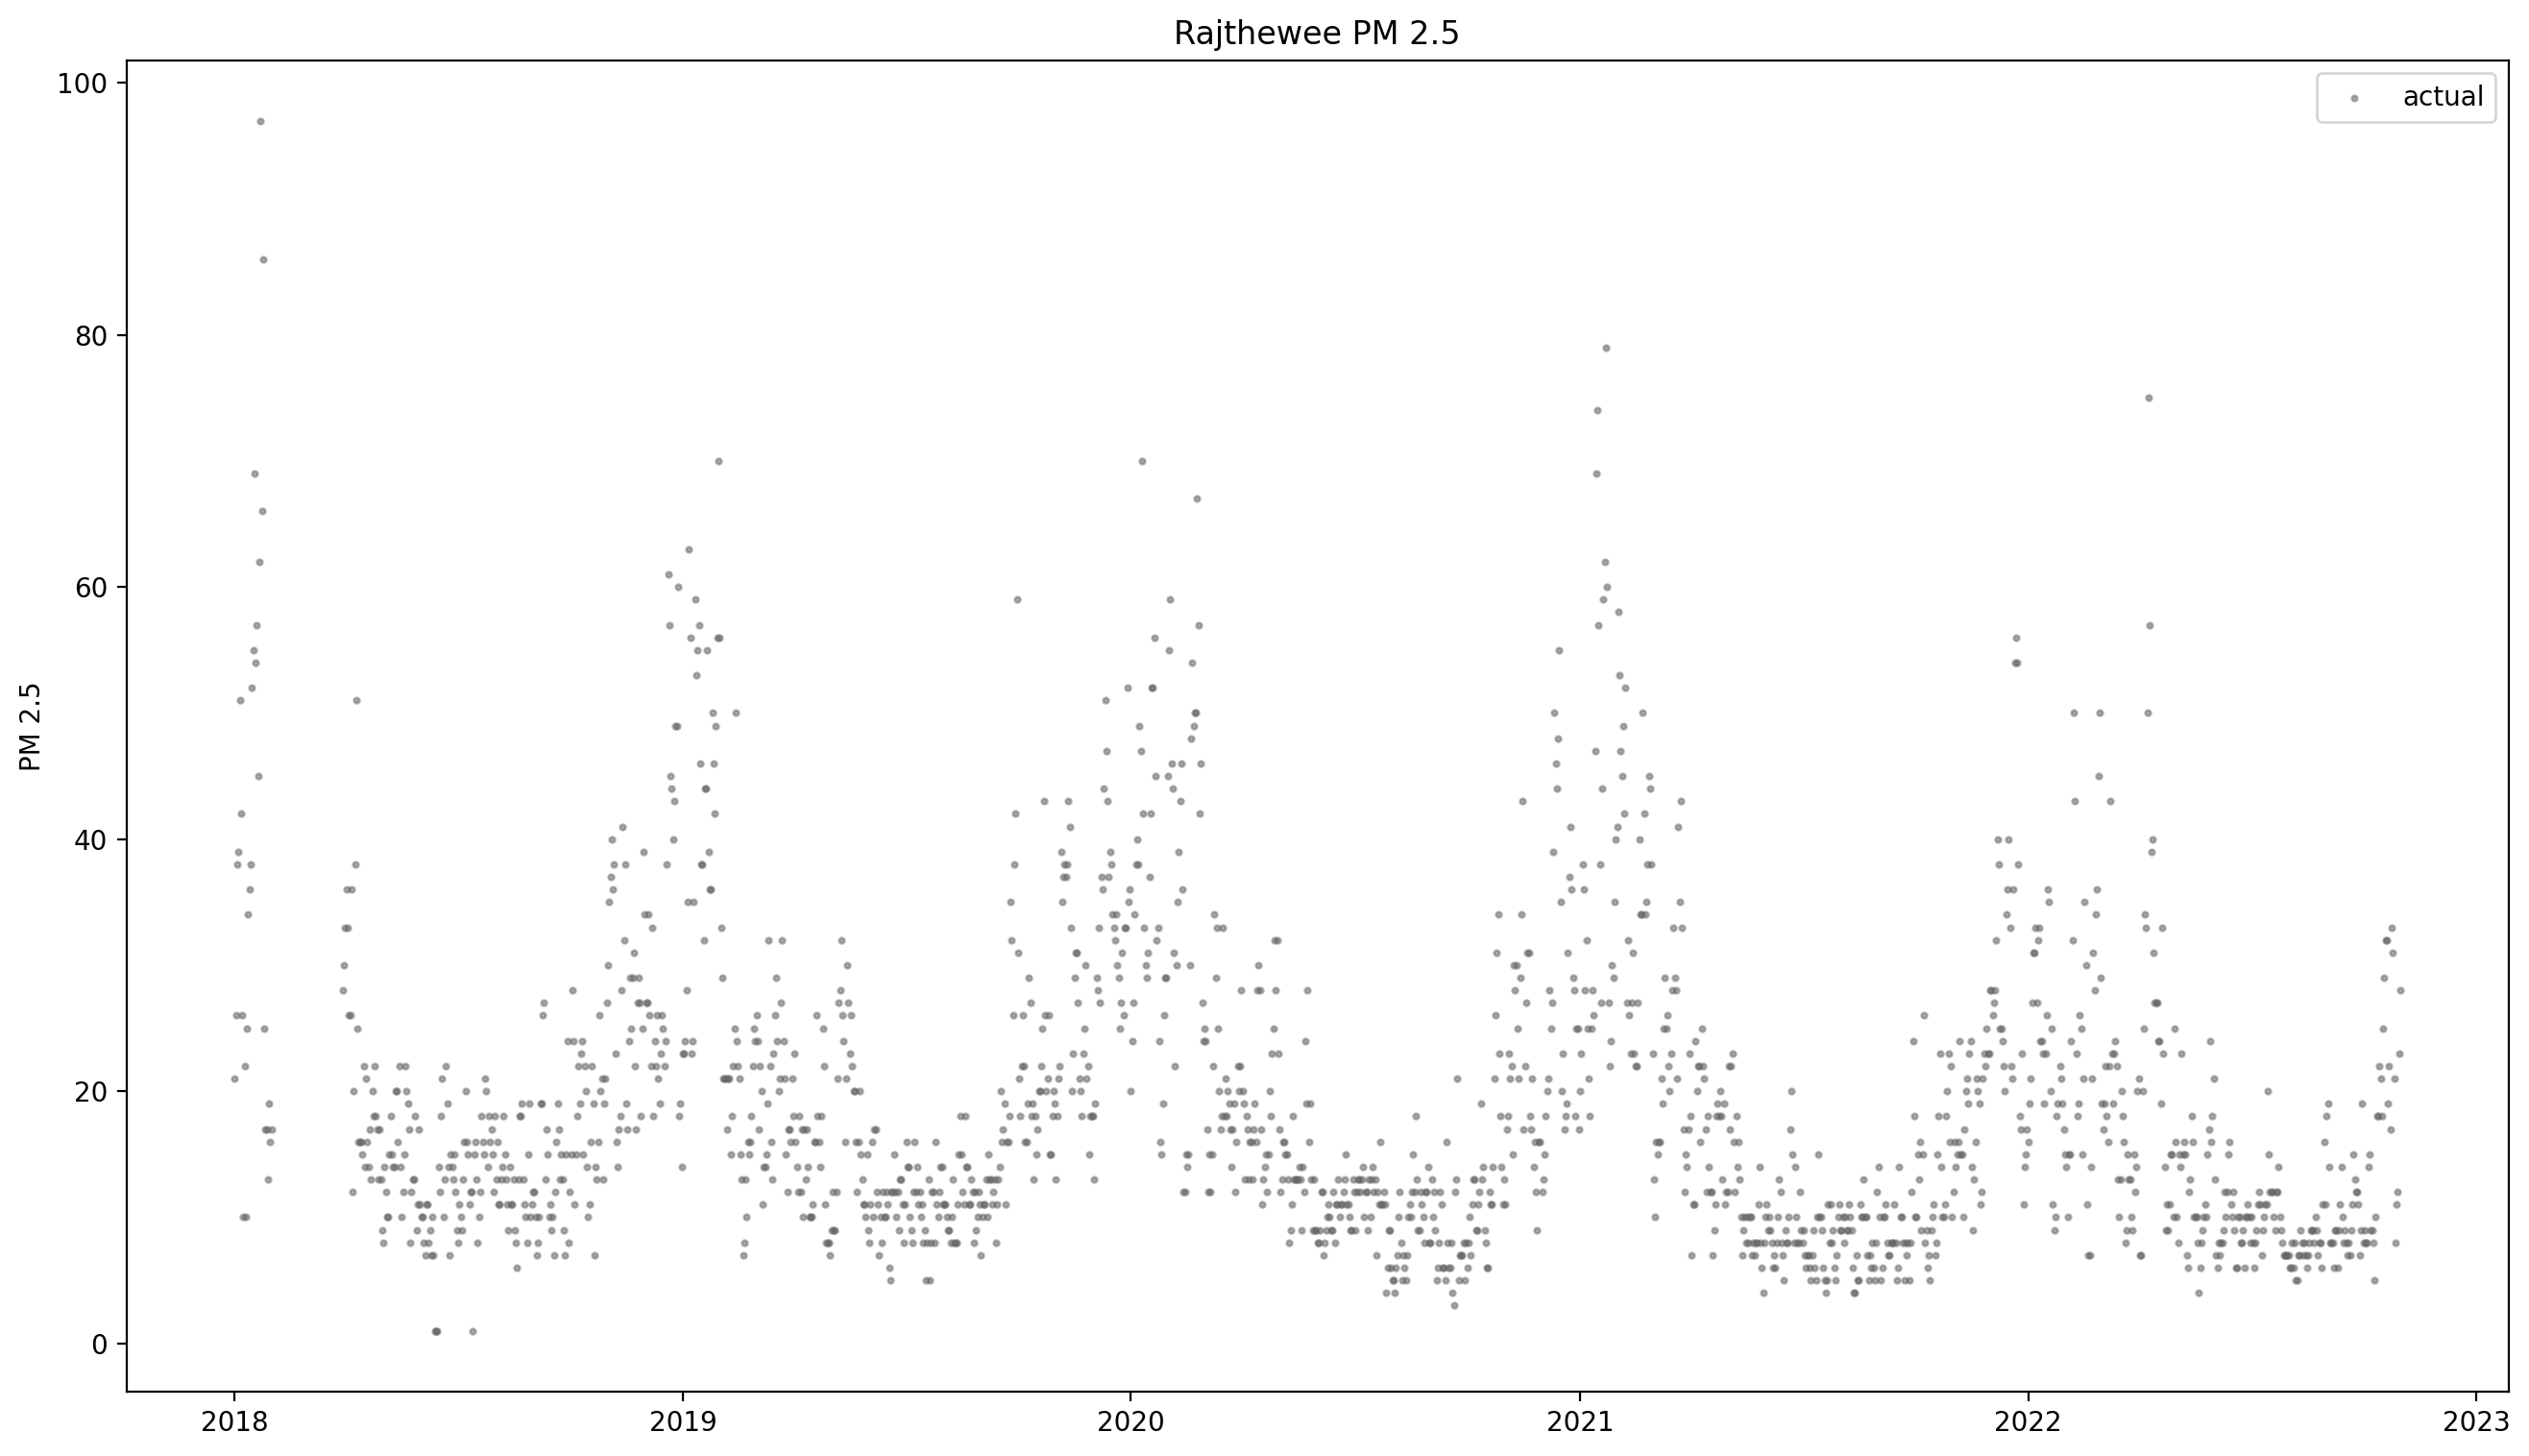

In [16]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.ylabel('PM 2.5')
plt.title('Rajthewee PM 2.5')
plt.legend();

In [17]:
feature_cols=[
    'year', 'month', 
    'day', 
    'day_name'
]
X=df[feature_cols]
y=df[y_col]

In [18]:
split_at=1500
X_train, X_test, y_train, y_test=X[:split_at], X[split_at:], y[:split_at], y[split_at:]

In [19]:
import lightgbm as lgb
print(f'lightgbm version = {lgb.__version__}')

lightgbm version = 3.3.5


In [20]:
reg = lgb.LGBMRegressor()

In [21]:
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [22]:
params={'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
}
# reg = lgb.LGBMRegressor()
# reg = lgb.LGBMRegressor(**params)

In [23]:
fit_params={'early_stopping_rounds':200, 
            'eval_set': [(X_test, y_test)],
            'verbose': 10
           }
reg.fit(X_train, y_train, **fit_params)

[10]	valid_0's l2: 56.6191
[20]	valid_0's l2: 50.7384
[30]	valid_0's l2: 52.7567
[40]	valid_0's l2: 53.9393
[50]	valid_0's l2: 57.1808
[60]	valid_0's l2: 58.864
[70]	valid_0's l2: 61.965
[80]	valid_0's l2: 64.8789
[90]	valid_0's l2: 65.8458
[100]	valid_0's l2: 65.7743


LGBMRegressor()

In [24]:
reg.__dict__

{'boosting_type': 'gbdt',
 'objective': None,
 'num_leaves': 31,
 'max_depth': -1,
 'learning_rate': 0.1,
 'n_estimators': 100,
 'subsample_for_bin': 200000,
 'min_split_gain': 0.0,
 'min_child_weight': 0.001,
 'min_child_samples': 20,
 'subsample': 1.0,
 'subsample_freq': 0,
 'colsample_bytree': 1.0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'random_state': None,
 'n_jobs': -1,
 'silent': 'warn',
 'importance_type': 'split',
 '_Booster': <lightgbm.basic.Booster at 0x7f3ae258d130>,
 '_evals_result': {'valid_0': OrderedDict([('l2',
                [105.89626427783585,
                 94.82395668439034,
                 85.30741865504892,
                 78.37743049687744,
                 71.67820088364408,
                 67.17536534859433,
                 63.47173506507396,
                 60.522052754407845,
                 58.575633080866574,
                 56.61905381238614,
                 55.42790806907883,
                 54.2416770704058,
                 53.62973985347

In [25]:
reg.score(X_train, y_train)

0.6499918464705615

In [26]:
reg.score(X_test, y_test)

0.313792179269359

In [27]:
reg.predict(X_test)

array([20.85828564, 20.85828564, 23.23577286, 23.23577286, 21.41372981,
       16.86608245, 16.86608245, 16.6446045 , 16.6446045 , 16.3445715 ,
       16.3445715 , 16.3445715 , 16.6446045 , 17.02582495, 17.74986073,
       17.74986073, 17.82272868, 17.59365362, 17.60012826, 17.26297034,
       17.26297034, 17.26297034, 13.65937813, 14.18062388, 14.18062388,
       14.18062388, 13.65937813, 13.65937813, 13.65937813, 14.0142756 ,
       13.85166335, 13.85166335, 13.19785382, 13.03150554, 12.05675181,
       12.05675181, 12.05675181, 11.79246184, 11.79246184, 11.79246184,
       12.05675181, 11.91605575, 11.91605575, 11.91605575, 11.65176579,
       11.65176579, 11.65176579, 11.91605575, 11.65824043, 11.65824043,
       11.65824043, 11.65824043, 11.65824043, 10.75098928, 10.75098928,
       10.75098928, 10.75098928, 10.75098928, 10.75098928, 10.75098928,
       10.75098928, 10.42202876, 10.42202876, 10.42202876, 10.42202876,
       10.42202876, 10.42202876, 10.42202876, 10.42202876, 10.42

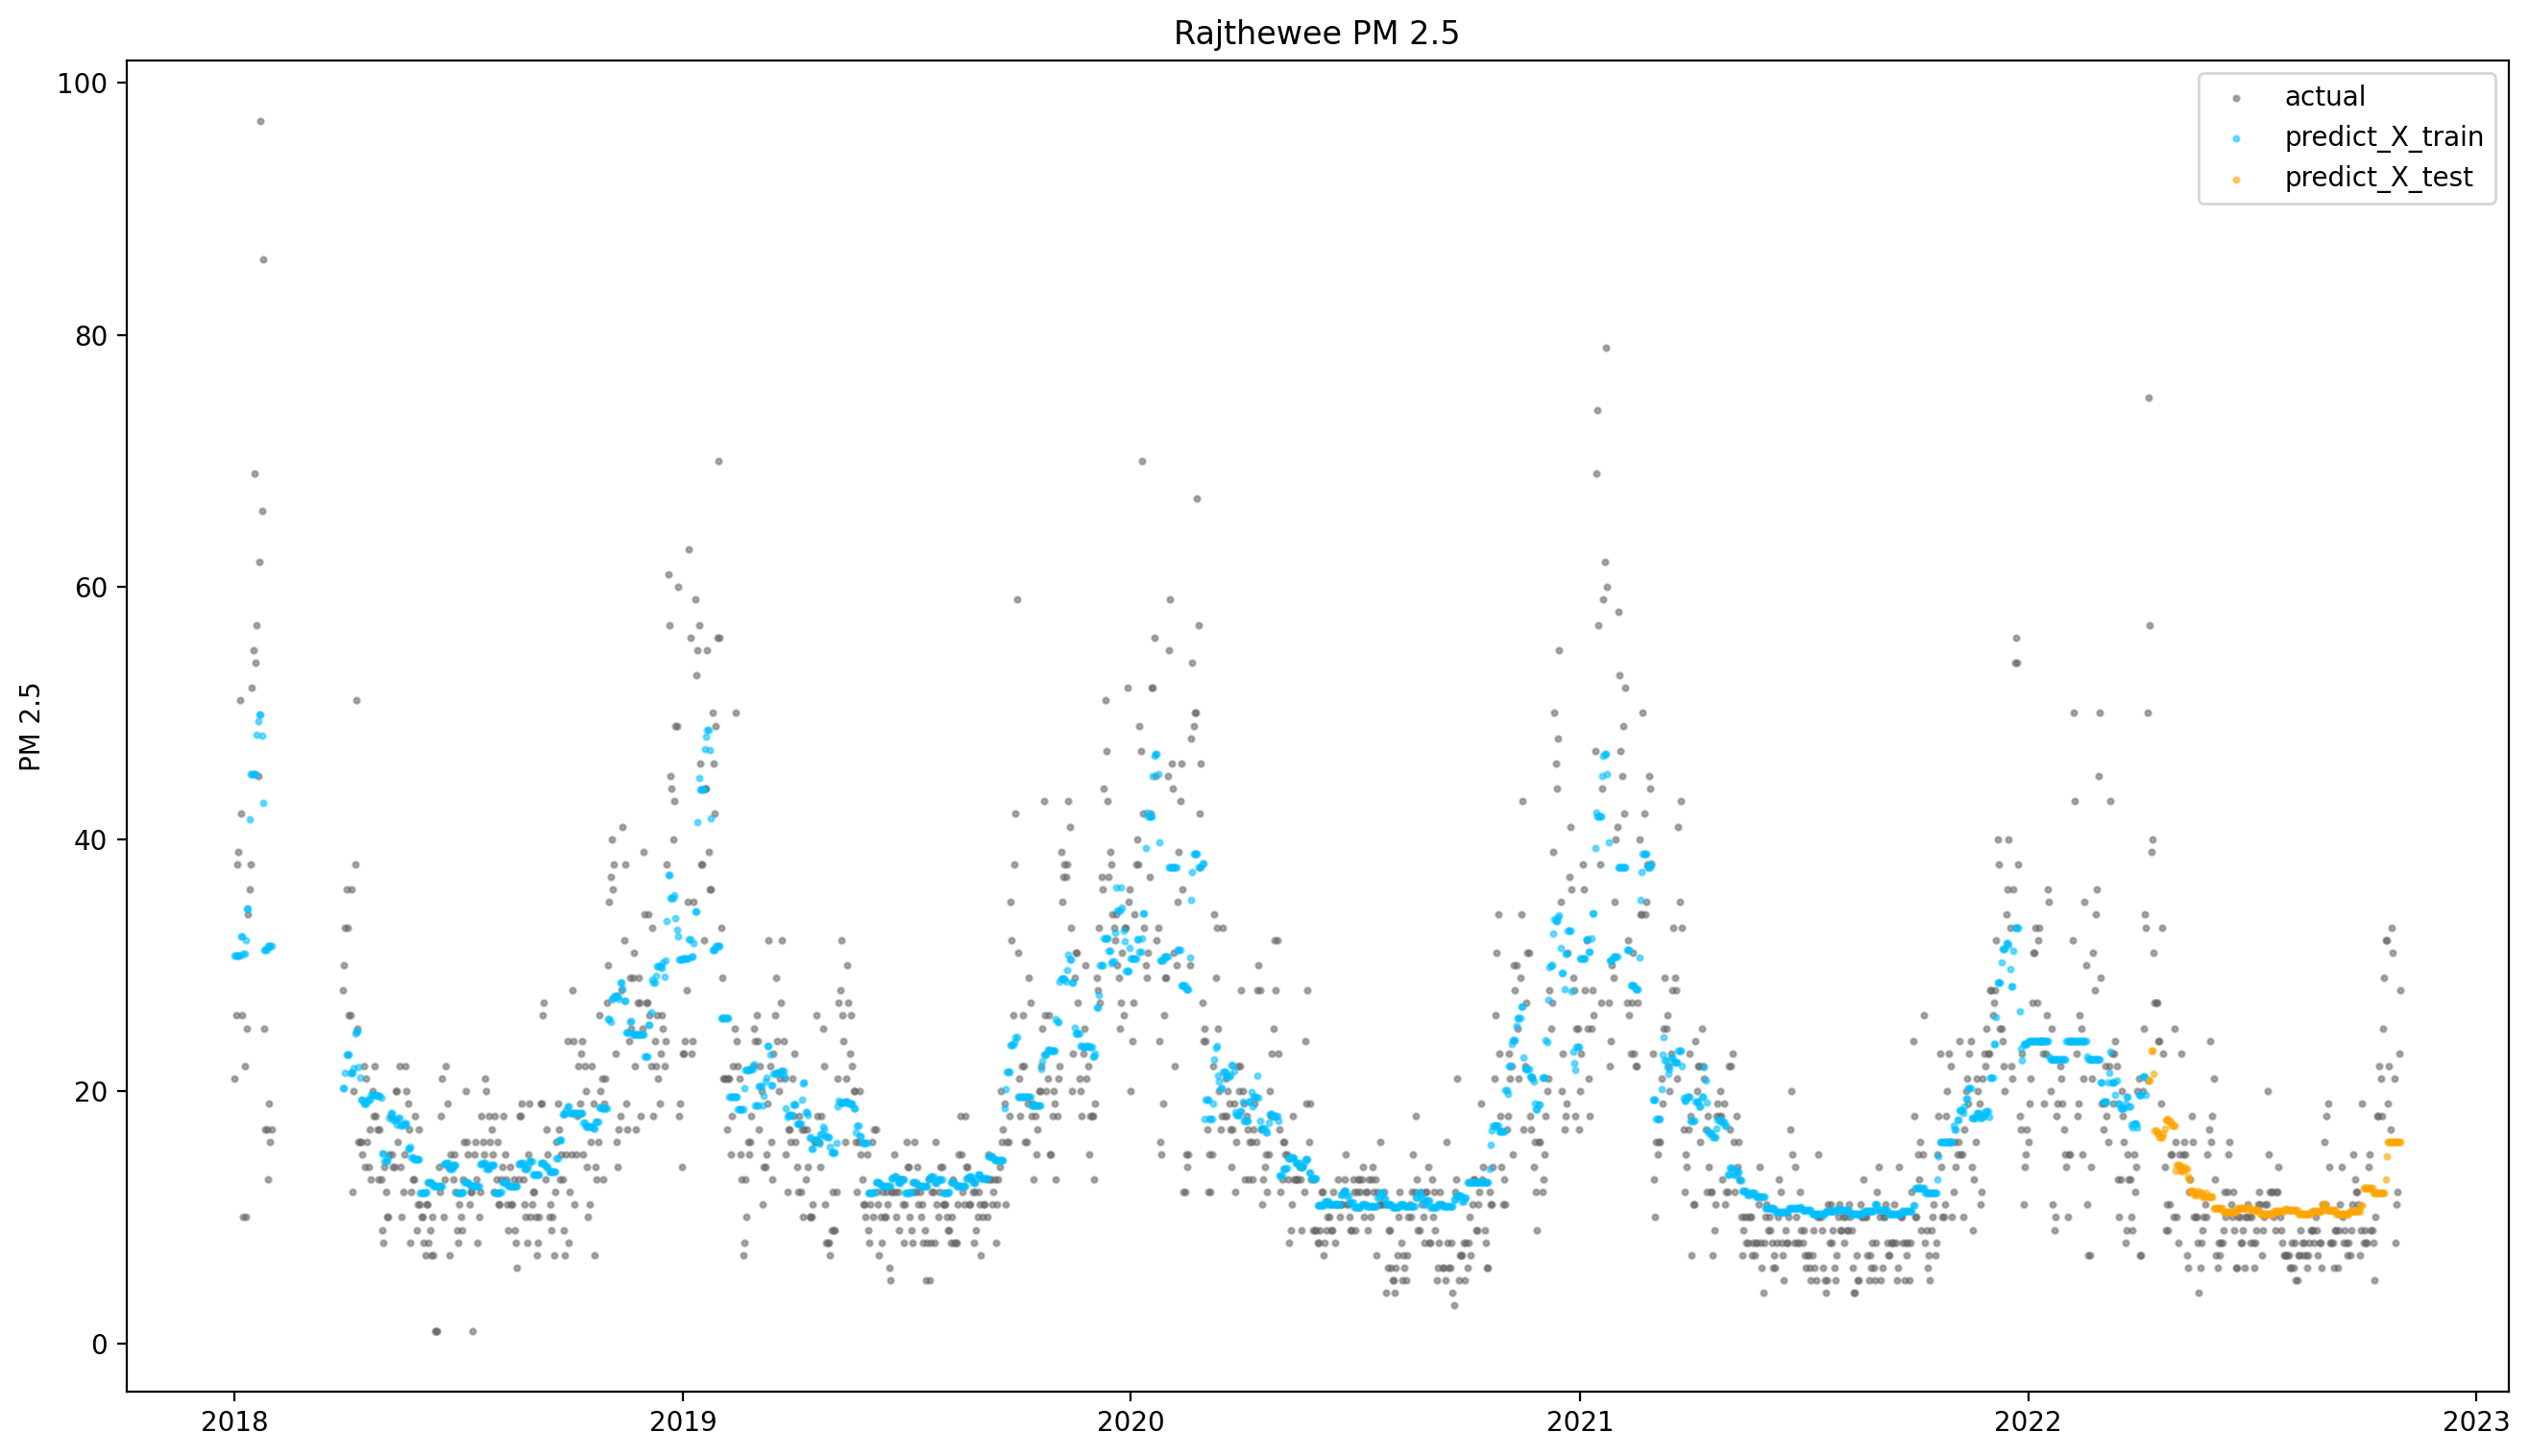

In [28]:
plt.figure(figsize=(16, 9))
plt.scatter(df.index, df[y_col], alpha=.5, s=4, label='actual', color='.4')
plt.scatter(X_train.index, reg.predict(X_train), alpha=.5, s=4, label='predict_X_train', color='deepskyblue')
plt.scatter(X_test.index, reg.predict(X_test), alpha=.5, s=4, label='predict_X_test', color='orange')
plt.ylabel('PM 2.5')
plt.title('Rajthewee PM 2.5')
plt.legend();

In [29]:
df.head(3000)

,year,month,day,day_name,pm25
date,,,,,
2018-01-01,2018,1,1,Monday,21.0
2018-01-02,2018,1,2,Tuesday,26.0
2018-01-03,2018,1,3,Wednesday,38.0
2018-01-04,2018,1,4,Thursday,39.0
2018-01-05,2018,1,5,Friday,51.0
...,...,...,...,...,...
2022-10-27,2022,10,27,Thursday,8.0
2022-10-28,2022,10,28,Friday,11.0
2022-10-29,2022,10,29,Saturday,12.0


In [30]:
yhat=[]

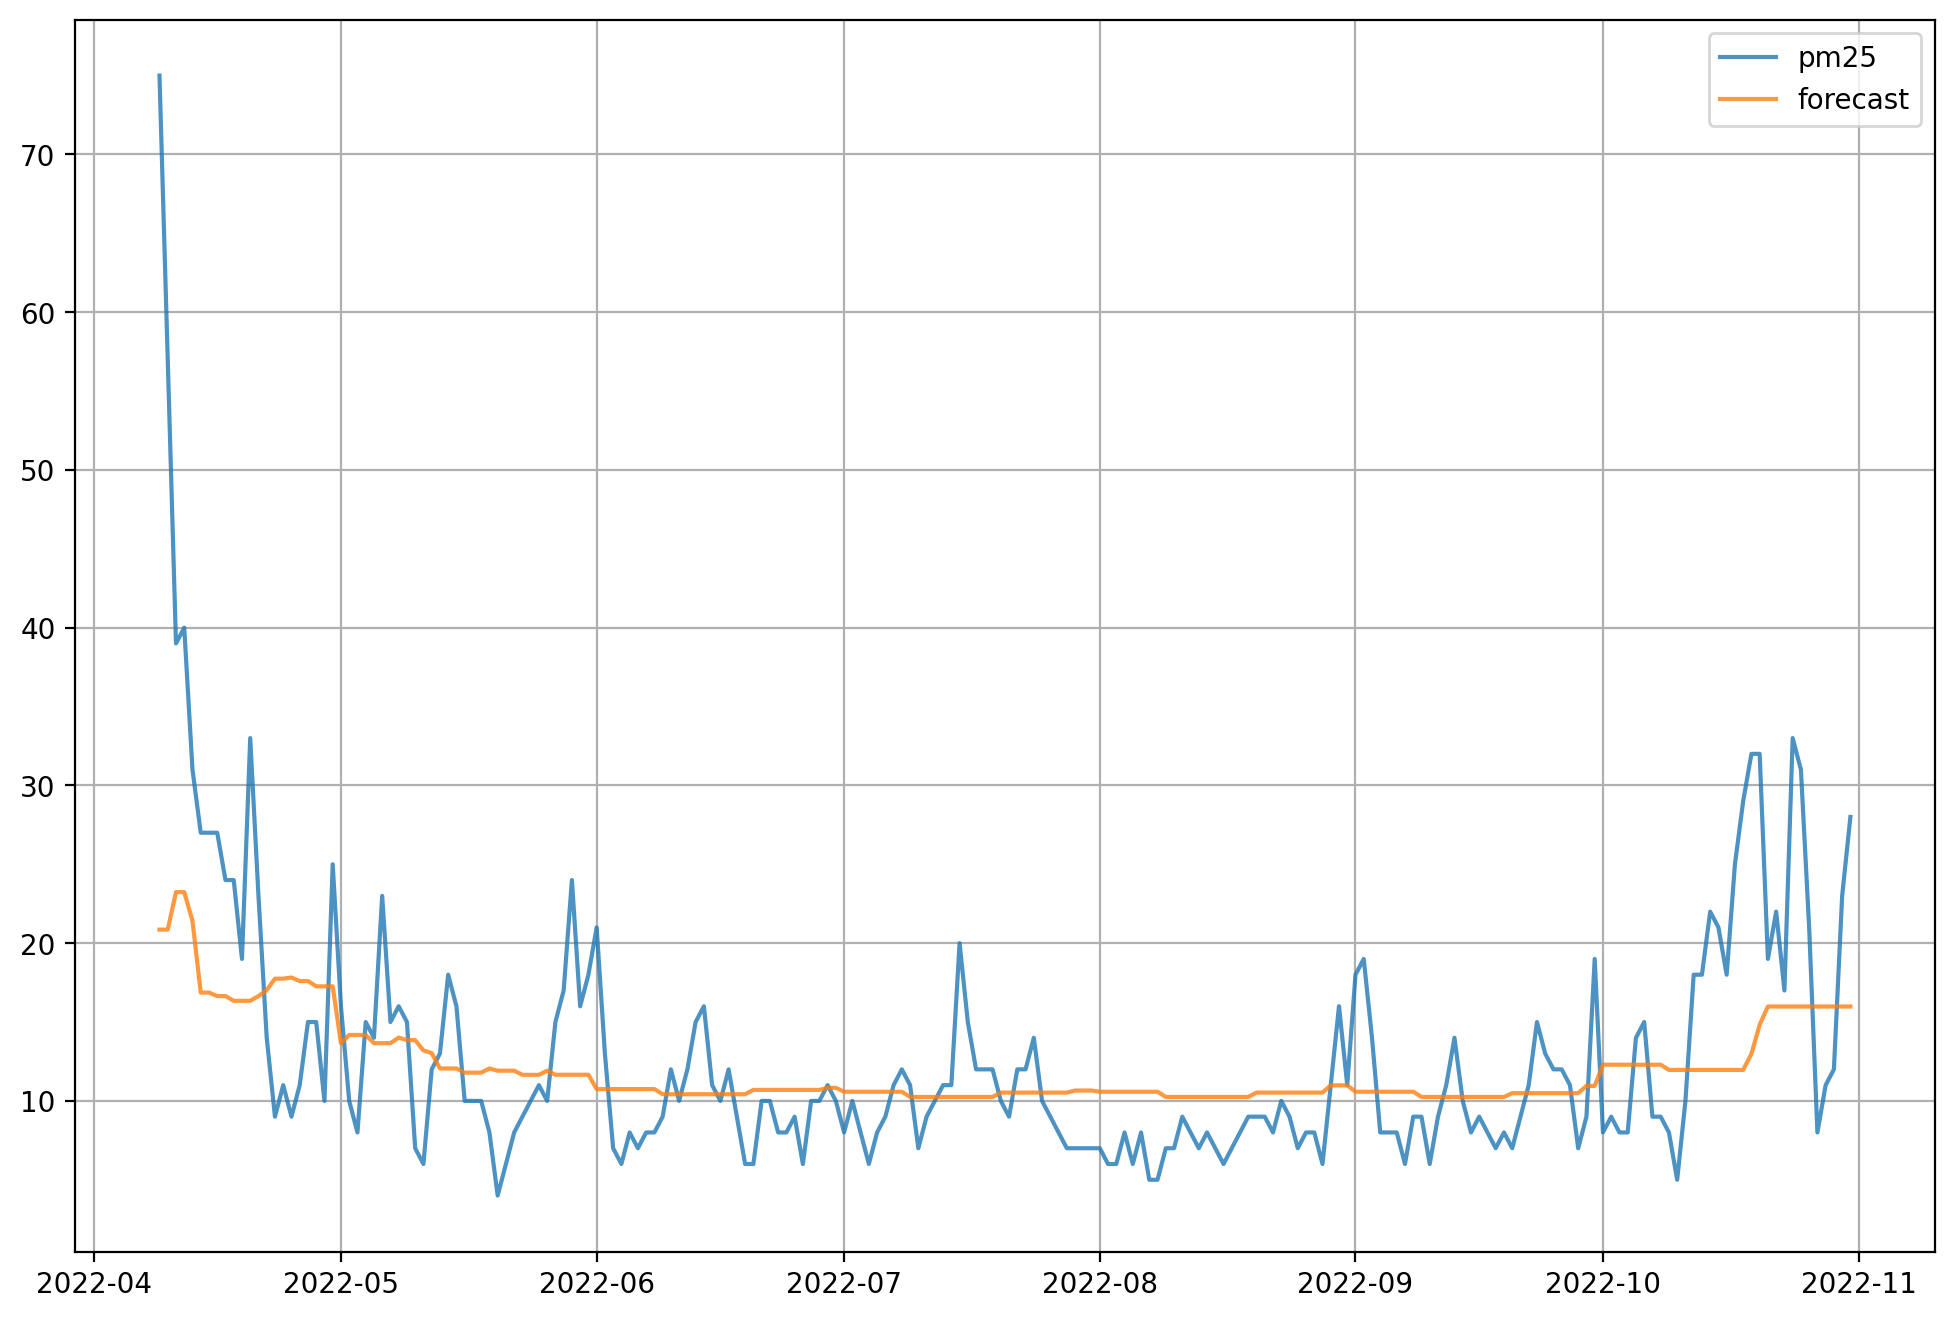

In [31]:
# test พยากรณ์กราฟ
yhat = reg.predict(X_test)

# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy() #ข้อมูลส่วนท้ายเป็น test
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['pm25', 'forecast']: #'forecast'

    plt.plot(
        'date',
        dtype,
        data=fc,
        label=dtype,
        alpha=0.8
    )
plt.legend()
plt.grid()
plt.show()

In [32]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7)
ypred

,พยากรณ์ PM2.5
0,20.858286
1,20.858286
2,23.235773
3,23.235773
4,21.413730
5,16.866082
6,16.866082


In [33]:
predict = pd.DataFrame(yhat)
ypred = predict.rename(columns={0:'พยากรณ์ PM2.5'}).head(7).round(0)
ypred

,พยากรณ์ PM2.5
0,21.0
1,21.0
2,23.0
3,23.0
4,21.0
5,17.0
6,17.0


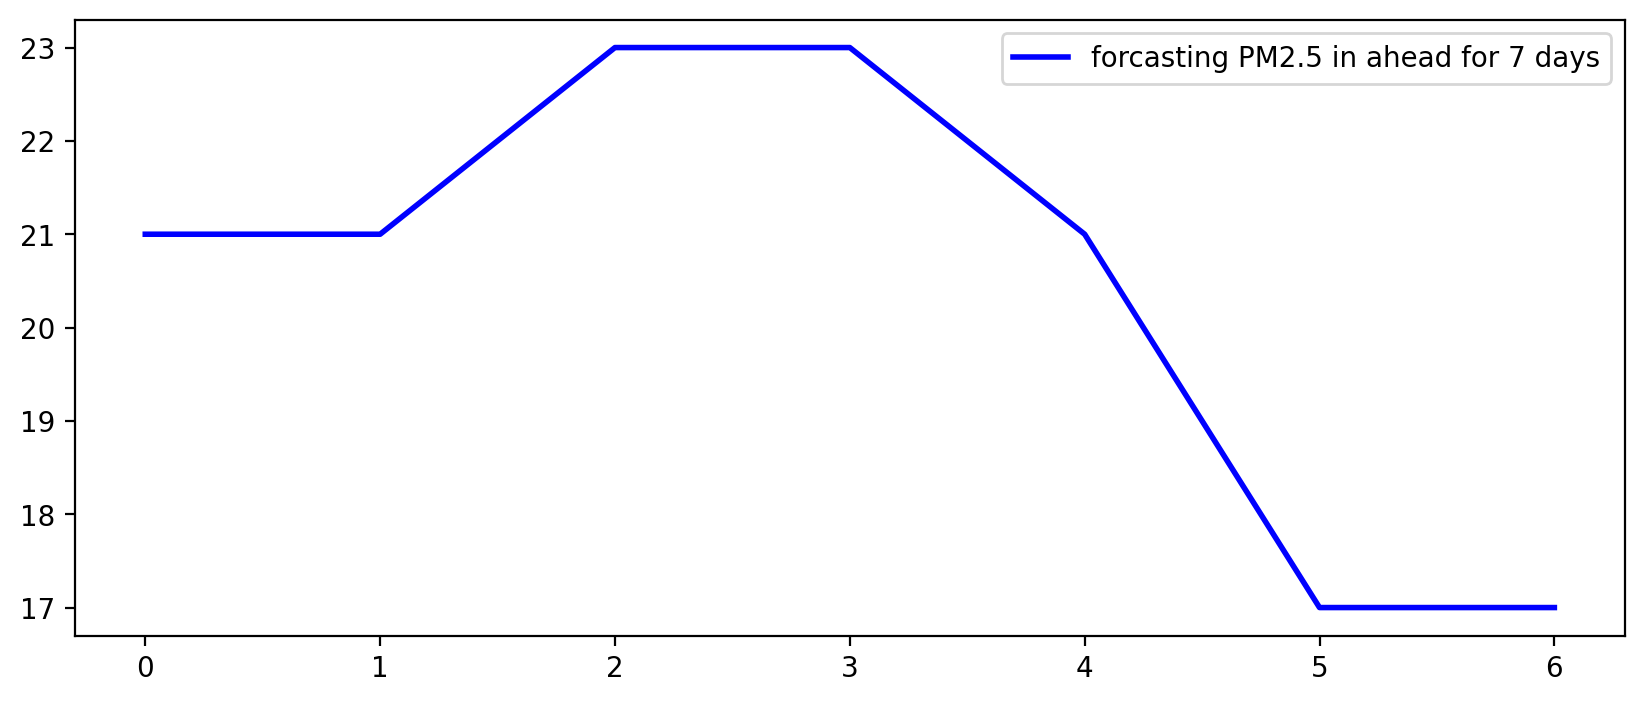

In [34]:
plt.figure(figsize=(10, 4))
plt.plot(ypred, 'b', lw=2.0, label='forcasting PM2.5 in ahead for 7 days')
plt.legend()
plt.show()

In [35]:
Y_pred=reg.predict(X_test)
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_pred,y_test)
print('MSE',mse)
rmse = np.sqrt(mse)
print('RMSE',rmse)

MSE 50.73837055626149
RMSE 7.123087150685543
